## **Install necessary Libraries**

In [ ]:
# Installing langdetect which is a language conversion API
!pip install googletrans
!pip install langdetect
!pip install pyldavis

     |████████████████████████████████| 61kB 4.2MB/s 
     |████████████████████████████████| 51kB 5.3MB/s 
     |████████████████████████████████| 962kB 8.5MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
     |████████████████████████████████| 102kB 8.9MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=cc063a082d1fb63c67f841c65b44d69c8187f613fbda7cb3ffa22889a17e8e3b
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=6c770653dbe35a9a5c021bac0bbb3a16edf9ca6e33b79f05f0ba52bec3a506d8
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars
     |████████████████████████████████| 983kB 7.9MB/s 
  Created wheel for langdetect: filename=la

In [ ]:
# Import necessary libraries with required versions
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import tensorflow
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# Import libraries required for language detection and translation
import googletrans
from langdetect import detect, DetectorFactory
from googletrans import Translator

# import NLTK and necessary libraries
import re
import nltk
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')     # Considering stopwords from English
nltk.download('punkt')         # Downloading puntuation
nltk.download('wordnet')

from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Import libraries required for model building
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Import libraries for building neural networks
from tensorflow.keras import Input, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, Embedding, LSTM, GRU, Flatten, Dropout, SpatialDropout1D, Conv2D, MaxPooling1D, TimeDistributed, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
# Visualize the topics
pyLDAvis.enable_notebook()

# Import libraries for PCA and KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm
import operator

## **Load Dataset and perform EDA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Change directory to set File path**

In [ ]:
os.chdir('/content/drive/My Drive/Capstone_Project')
path='.'
raw_data = pd.read_excel('input_data.xlsx')

**Explore Raw Data**

In [ ]:
# Checking sample data
raw_data.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
# Checking shape of data
raw_data.shape

(8500, 4)

In [ ]:
# Checking the informaton of the dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [ ]:
# Checking the distribution of the dataset
raw_data.describe().T

,count,unique,top,freq
Short description,8492,7481,password reset,38
Description,8499,7817,the,56
Caller,8500,2950,bpctwhsn kzqsbmtp,810
Assignment group,8500,74,GRP_0,3976


In [ ]:
# Check for missing values in given dataset
raw_data[raw_data.isna().any(axis=1)]

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [ ]:
# Checking sum of missing values for each column
raw_data.isna().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [ ]:
# Check for distribution of tickets in various groups. This helps to understand Bias / Imbalance in data distribution
groups = raw_data.groupby('Assignment group')['Caller'].count().sort_values(ascending=False)
groups.head(60)

Assignment group
GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     107
GRP_4      100
GRP_29      97
GRP_18      88
GRP_16      85
GRP_17      81
GRP_31      69
GRP_7       68
GRP_34      62
GRP_26      56
GRP_40      45
GRP_28      44
GRP_41      40
GRP_30      39
GRP_15      39
GRP_42      37
GRP_20      36
GRP_45      35
GRP_22      31
GRP_1       31
GRP_11      30
GRP_21      29
GRP_47      27
GRP_48      25
GRP_23      25
GRP_62      25
GRP_60      20
GRP_39      19
GRP_27      18
GRP_37      16
GRP_44      15
GRP_36      15
GRP_50      14
GRP_53      11
GRP_65      11
GRP_52       9
GRP_55       8
GRP_51       8
GRP_49       6
GRP_59       6
GRP_46       6
GRP_43       5
GRP_32       4
GRP_66       4
GRP_38       3
GRP_56       3
Name: Caller, dtype: int64

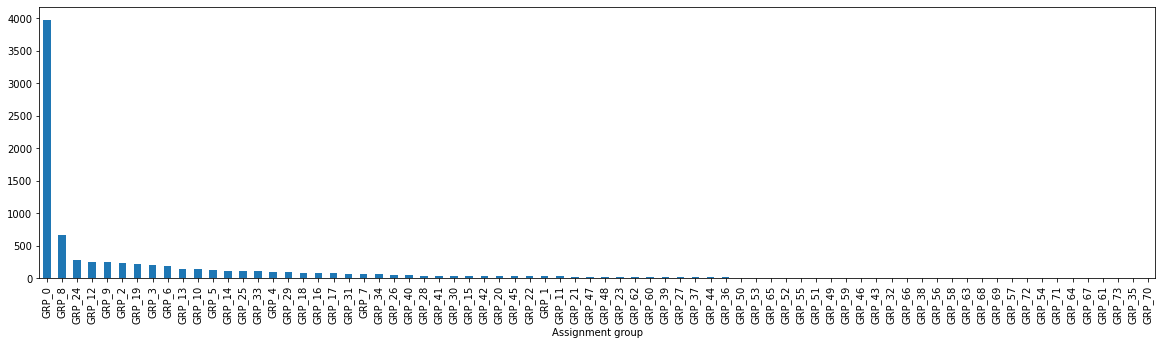

In [ ]:
# Visualize Group data spread
groups.plot(kind='bar', figsize=(20,5))

## **Data Pre-Processing**

In [ ]:
# Making a copy of the dataset
df = raw_data.copy()

In [ ]:
# Copy the text from Description to Short description and vice versa where there are missing values
# To remove missing values from 'Description' column
desc_nan_index = df[df['Description'].isna() == True].index
df.loc[desc_nan_index, 'Description'] = df.loc[desc_nan_index, 'Short description']

In [ ]:
# To remove missing values from 'Short description' column
shortdesc_nan_index = df[df['Short description'].isna() == True].index
for i in shortdesc_nan_index:
  df.loc[i, 'Short description'] = df.loc[i, 'Description']

In [ ]:
# Checking if there are still any missing values
df.isna().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

In [ ]:
# Creating a new column called 'string_compare' to compare 'Short description' and 'Description' columns

df['string_compare'] = df.apply(lambda x: x['Short description'] not in x['Description'], axis=1)
df.head()

,Short description,Description,Caller,Assignment group,string_compare
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,True
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,False
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,True
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,False
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,False


In [ ]:
# Append Short description to Description if string_compare is True
df_combined = df.copy()
df_combined.loc[df_combined['string_compare'] == True, 'Description'] = df_combined['Short description'] + " "+ df_combined['Description']

In [ ]:
#Drop Short description and string_compare columns
df_combined = df_combined.drop(['Short description', 'string_compare'],axis=1)
df_combined.head(5)

,Description,Caller,Assignment group
0,login issue -verified user details.(employee# ...,spxjnwir pjlcoqds,GRP_0
1,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn \r\n\r\nreceived from: eylq...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,owlgqjme qhcozdfx,GRP_0


**Remove caller names from Description column**

In [ ]:
# Check for caller names in the Description column
count = 0
for w in df_combined['Caller'].unique():
  if df_combined['Description'].str.contains(w).any():
    count = count + 1
print(count)

657


In [ ]:
# Split the caller name into firstname and lastname
caller_list = df_combined['Caller'].str.split(' ', n = 1, expand = True)      # Caller name is separated into 2 strings
caller_firstname = caller_list[0].to_list()     # Firstname of the caller
caller_lastname = caller_list[1].to_list()      # Lastname of the caller

In [ ]:
# Removing caller_firstname and caller_lastname from Description column
for i, text in enumerate(df_combined['Description']):
  df_combined.at[i,'Description'] = " ".join(word for word in text.split(' ') if word not in caller_firstname and word not in caller_lastname)

In [ ]:
# Check for caller names in the Description column
count2 = 0
for w in df_combined['Caller'].unique():
  if df_combined['Description'].str.contains(w).any():
    count2 = count2 + 1
print(count2)

185


In [ ]:
# Caller names in Description column are reduced from 657 to 185
# Remove 'Caller' column
df_combined = df_combined.drop(['Caller'], axis=1)

In [ ]:
#Convert to lowercase
df_combined.apply(lambda x: x.astype(str).str.lower())

,Description,Assignment group
0,login issue -verified user details.(employee# ...,grp_0
1,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,grp_0
2,cant log in to vpn \r\n\r\nreceived from: eylq...,grp_0
3,unable to access hr_tool page,grp_0
4,skype error,grp_0
...,...,...
8495,emails not coming in from zz mail \r\n\r\nrece...,grp_29
8496,telephony_software issue,grp_0
8497,vip2: windows password reset for tifpdchb pedx...,grp_0
8498,machine nã£o estã¡ funcionando i am unable to ...,grp_62


**Language Detection**

In [ ]:
# Detecting the language
DetectorFactory.seed = 0
languages = googletrans.LANGUAGES

In [ ]:
# Create a new column called 'Language'
df_combined['Language'] = df_combined['Description'].apply(lambda x: detect(x))
df_combined['Language'] = df_combined['Language'].apply(lambda x: languages[x])

In [ ]:
#groupby language in each group and store the value in column named lang_percentage
each_group = df_combined.groupby(['Assignment group','Language']).agg({'Language': 'count'}).rename(columns={'Language':'lang_percentage'})
#calculate the percentage of each language within groups and store in new dataframe lang_pcts
lang_pcts = each_group.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

In [ ]:
lang_pcts.head()

lang_percentage
Assignment group Language                  
GRP_0            afrikaans         5.658954
                 catalan           0.754527
                 czech             0.050302
                 danish            0.377264
                 dutch             0.804829

In [ ]:
lang_pcts.reset_index(level=1, inplace=True)
lang_pcts[lang_pcts['Language']=='english'].sort_values('lang_percentage').head(50)

,Language,lang_percentage
Assignment group,,
GRP_48,english,4.000000
GRP_30,english,7.692308
GRP_42,english,10.810811
GRP_24,english,22.145329
GRP_33,english,26.168224
GRP_31,english,31.884058
GRP_62,english,40.000000
GRP_49,english,50.000000
GRP_32,english,50.000000


In [ ]:
df_combined['Language'].value_counts()

english       7059
german         387
afrikaans      268
italian        143
french         121
norwegian       79
swedish         77
danish          70
catalan         59
spanish         57
dutch           56
polish          25
portuguese      24
romanian        13
filipino        12
welsh           11
estonian         8
slovenian        5
turkish          5
indonesian       5
slovak           3
albanian         3
finnish          3
lithuanian       2
croatian         2
czech            2
latvian          1
Name: Language, dtype: int64

In [ ]:
print("% of data in english:", (sum(df_combined['Language']=='english')/len(df_combined['Language']))*100)

% of data in english: 83.04705882352941


In [ ]:
# Preparing a regular exressions list for all the unwanted words, numbers, emails, special characters etc

regexList = []
regexList += ['received from:(.*)\r\n']        # from line
regexList += ['sent:(.*)\r\n']                 # sent to line
regexList += ['received from:(.*)\r\n']        # received from data line
regexList += ['received']                      # received data line
regexList += ['to:(.*)\r\n']                   # to line
regexList += ['cc:(.*)\r\n']                   # cc line
regexList += ['\[cid:(.*)]']                   # images cid
regexList += ['(.*)infection']                 # footer
regexList += ['https?:[^\]\n\r]+']             # https & http
regexList += ['subject:']                      # subject
regexList += ['[\w\d\-\_\.]+@[\w\d\-\_\.]+']   # email IDs
regexList += ['[0-9][\-0–90-9 ]+']             # phone numbers
regexList += ['[0-9]']                         # numbers
regexList += ['[^a-zA-z 0-9]+']                # Special characters   
regexList += [' [a-zA-Z] ']                    # single letters
regexList += ['\s+']                           # More than one space    
regexList += ['[\r\n]']                        # \r\n
regexList += ['[^a-zA-Z]']                     # Not an alphabet

**Remove text with Regex**

In [ ]:
# Applying regular expresions to remove unwanted words, numbers, emails etc 
for regex in regexList:
    df_combined['Description'] = df_combined['Description'].str.replace(regex, ' ')
df_combined['Description'].head()

0    login issue verified user details employee man...
1     hello team my meetings skype meetings etc are...
2     cant log in to vpn hi cannot log on to vpn best 
3                        unable to access hr tool page
4                                         skype error 
Name: Description, dtype: object

**Translating non english to english**

In [ ]:
translator = Translator()
# assigning non english data to new dataframe df_trans
df_trans = df_combined[df_combined['Language'] != 'english']
df_trans.describe()

,Description,Assignment group,Language
count,1441,1441,1441
unique,1137,44,26
top,,GRP_0,german
freq,33,809,387


In [ ]:
df_trans['Language'].value_counts()

german        387
afrikaans     268
italian       143
french        121
norwegian      79
swedish        77
danish         70
catalan        59
spanish        57
dutch          56
polish         25
portuguese     24
romanian       13
filipino       12
welsh          11
estonian        8
indonesian      5
turkish         5
slovenian       5
albanian        3
finnish         3
slovak          3
lithuanian      2
croatian        2
czech           2
latvian         1
Name: Language, dtype: int64

In [ ]:
result = df_trans['Description'].apply(translator.translate, dest='en') # translating the description and storing in result
for index, row in df_trans.iterrows():
  df_trans.at[index,'Description_eng'] = result[index].text # storing the translated description in new column description_eng

In [ ]:
# store the english description from df_trans dataframe to df_combined dataframe for non english sentences

lang_non_eng_index = df_trans.index
df_combined.loc[lang_non_eng_index, 'Description_eng'] = df_trans.loc[lang_non_eng_index, 'Description_eng']

In [ ]:
print(len(lang_non_eng_index))

1441


In [ ]:
# store the english description from description column to description_eng column for english sentences
lang_eng = df_combined[df_combined['Language'] == 'english']
lang_eng_index = lang_eng.index
df_combined.loc[lang_eng_index, 'Description_eng'] = df_combined.loc[lang_eng_index, 'Description']

In [ ]:
print(len(lang_eng_index))

7059


In [ ]:
df_combined[df_combined['Language'] == 'english']

,Description,Assignment group,Language,Description_eng
0,login issue verified user details employee man...,GRP_0,english,login issue verified user details employee man...
1,hello team my meetings skype meetings etc are...,GRP_0,english,hello team my meetings skype meetings etc are...
2,cant log in to vpn hi cannot log on to vpn best,GRP_0,english,cant log in to vpn hi cannot log on to vpn best
3,unable to access hr tool page,GRP_0,english,unable to access hr tool page
5,unable to log in to engineering tool and skype,GRP_0,english,unable to log in to engineering tool and skype
...,...,...,...,...
8494,tablet needs reimaged due to multiple issues w...,GRP_3,english,tablet needs reimaged due to multiple issues w...
8495,emails not coming in from zz mail good afterno...,GRP_29,english,emails not coming in from zz mail good afterno...
8496,telephony software issue,GRP_0,english,telephony software issue
8497,vip windows password reset for tifpdchb pedxruyf,GRP_0,english,vip windows password reset for tifpdchb pedxruyf


In [ ]:
df_combined.isna().sum()

Description         0
Assignment group    0
Language            0
Description_eng     0
dtype: int64

**Finding words occuring in most of the documents**

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_combined['Description_eng'])
count = pd.DataFrame(list(zip(vectorizer.get_feature_names(), X.sum(0).getA1())), columns=['word','count'])

In [ ]:
bvectorizer = CountVectorizer(binary=True)
B = bvectorizer.fit_transform(df_combined['Description_eng'])
bcount = pd.DataFrame(list(zip(bvectorizer.get_feature_names(), B.sum(0).getA1())), columns=['word','count'])

In [ ]:
for index, row in count.iterrows():
  count.loc[index, 'doc_count'] = bcount.loc[index,'count']

for index, row in count.iterrows():
  count.loc[index, 'frequency'] = count.loc[index,'doc_count']/count.loc[index,'count']

In [ ]:
count.sort_values('frequency').head(5)

,word,count,doc_count,frequency
5173,inside,419,17.0,0.040573
2760,dm,18,1.0,0.055556
108,acl,185,11.0,0.059459
6238,locky,30,2.0,0.066667
5812,krcscfpr,15,1.0,0.066667


**Adding frequent words to stop list and removing them**

In [ ]:
newStopWords = count[count['frequency'] >= 0.99]['word']
# Removing stopwords
stop_words = nltk.corpus.stopwords.words('english')
stop_words.extend(newStopWords)
for i, text in enumerate(df_combined['Description_eng']):
  df_combined['Description_eng'][i] = " ".join(word for word in text.split(' ') if word not in stop_words)

**Tokenization**

In [ ]:
# Tokenization
def desc_to_words(desc): 
    words = RegexpTokenizer('\w+').tokenize(desc)
    words = list(filter(lambda a: a != '', words))
    return words

**Vocabulary and Lemmatization**

In [ ]:
lemma_words = list()

# Getting tokens from Tokenization function
for desc in df_combined['Description_eng']:            
    temp_list = desc_to_words(desc)     # temp_list to process lemma words

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_desc = ' '.join([lemmatizer.lemmatize(w) for w in temp_list])
    lemma_words.append(lemmatized_desc)

# Copying the lemma_words into 'Description' column of the dataset
df_combined['Description_eng'] = lemma_words    

# Vocabulary from the lemma_words
#for w in lemma_words:
all_words = ' '.join(lemma_words).split()     # all_words give complete vocabulary list 

In [ ]:
# Size of vocabulary
print('Size of vocabulary: {}'.format(len(set(all_words))))

# Sample list of the all_words  in each record
print(all_words[:20])

Size of vocabulary: 3683
['login', 'issue', 'user', 'detail', 'employee', 'manager', 'name', 'checked', 'user', 'name', 'ad', 'reset', 'password', 'advised', 'user', 'login', 'check', 'caller', 'confirmed', 'able']


In [ ]:
# Checking for sample data
print('Description\n', df_combined['Description_eng'][500], '\n')
print('Tokens\n', desc_to_words(df_combined['Description_eng'][500]))

Description
 cannot get crm missing sale markhtyeting tab enterprise portal access crm access crm 

Tokens
 ['cannot', 'get', 'crm', 'missing', 'sale', 'markhtyeting', 'tab', 'enterprise', 'portal', 'access', 'crm', 'access', 'crm']


In [ ]:
dataset = [d.split() for d in df_combined['Description_eng']]
# Create Dictionary
id2word = corpora.Dictionary(dataset)

# Create Corpus
texts = dataset

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 3), (11, 1), (12, 2), (13, 1), (14, 1), (15, 3)]]


In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=50, 
                                           random_state=32,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
lda_model.print_topics()
doc_lda = lda_model[corpus]

In [ ]:
print(lda_model.show_topics(num_topics=10, num_words=20))

[(5, '0.102*"attachment" + 0.079*"warehouse" + 0.064*"gr" + 0.062*"mm" + 0.050*"restore" + 0.043*"toolmail" + 0.037*"ship" + 0.033*"ir" + 0.023*"kds" + 0.016*"johthryugftyson" + 0.016*"hu" + 0.015*"mmaster" + 0.014*"kg" + 0.014*"dly" + 0.014*"google" + 0.014*"cip" + 0.014*"emea" + 0.013*"registered" + 0.013*"attribute" + 0.012*"weight"'), (25, '0.375*"tool" + 0.073*"EU" + 0.071*"sample" + 0.057*"und" + 0.044*"prod" + 0.043*"ist" + 0.036*"sold" + 0.033*"batch" + 0.029*"card" + 0.028*"bei" + 0.024*"bkbackup" + 0.013*"performance" + 0.012*"pp" + 0.012*"netch" + 0.011*"acct" + 0.010*"low" + 0.008*"bls" + 0.008*"ot" + 0.008*"auftr" + 0.007*"banking"'), (16, '0.128*"status" + 0.070*"missing" + 0.062*"win" + 0.057*"resolve" + 0.054*"save" + 0.054*"web" + 0.048*"purchasing" + 0.039*"failure" + 0.028*"url" + 0.025*"reason" + 0.025*"seen" + 0.025*"epmsystem" + 0.023*"button" + 0.019*"cart" + 0.015*"hash" + 0.013*"mensagem" + 0.012*"policy" + 0.012*"webside" + 0.012*"engg" + 0.010*"second"'), (19

In [ ]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
12     0.090015  0.244951       1        1  9.921386
38     0.023096 -0.021846       2        1  4.552893
7      0.022144 -0.021785       3        1  3.981808
14     0.022197 -0.032788       4        1  3.518259
22     0.058969 -0.043288       5        1  3.496309
46     0.016765 -0.030669       6        1  2.579944
21     0.025934  0.014084       7        1  2.565448
30     0.017452 -0.028960       8        1  2.402058
20     0.017210 -0.028959       9        1  2.333342
1      0.066055  0.257861      10        1  2.289775
42     0.015319 -0.031871      11        1  2.279795
24     0.059809  0.216767      12        1  2.269900
6      0.014835 -0.031980      13        1  2.191362
18     0.011946 -0.036815      14        1  2.060279
47     0.023358  0.000085      15        1  2.026519
36     0.025168  0.008346      16        1  1.994184
43     0.033515  0.057866      17        1  1.973642
37     0.013343 -0.034919      18        1  1.888866
11     0.015905 -0.032096      19        1  1.875913
10     0.022209 -0.040717      20        1  1.856356
23     0.009967 -0.037437      21        1  1.830209
26     0.021433 -0.002432      22        1  1.816121
28     0.011701 -0.036111      23        1  1.808991
4      0.028442  0.033857      24        1  1.799262
8      0.011502 -0.036802      25        1  1.744112
9      0.016543 -0.030185      26        1  1.695546
33     0.009881 -0.038551      27        1  1.651513
49     0.076418  0.281882      28        1  1.625358
45     0.014887 -0.041543      29        1  1.607584
32    -0.343724  0.061922      30        1  1.594855
15    -0.309239  0.051948      31        1  1.588647
29     0.009685 -0.033134      32        1  1.561454
2      0.008661 -0.039378      33        1  1.498616
40     0.037584 -0.067824      34        1  1.476792
27     0.025530  0.014740      35        1  1.458308
17     0.009830 -0.038645      36        1  1.395298
19     0.009514 -0.039169      37        1  1.369152
39     0.018265  0.000886      38        1  1.353180
31     0.025571 -0.054003      39        1  1.231543
41     0.005094 -0.043959      40        1  1.230541
35     0.010328 -0.037949      41        1  1.209391
13     0.011456 -0.037011      42        1  1.200203
48     0.008650 -0.039760      43        1  1.107407
44     0.002101 -0.047027      44        1  1.050647
34     0.013892 -0.010219      45        1  1.042143
25    -0.357494  0.057383      46        1  1.034481
5      0.005670 -0.039920      47        1  1.024532
16     0.004711 -0.043993      48        1  1.019318
0      0.004614 -0.043906      49        1  1.000315
3      0.003284 -0.046926      50        1  0.916440, topic_info=                    Term         Freq       Total Category  logprob  loglift
166                  job  2737.000000  2737.00000  Default  30.0000  30.0000
25                please  2241.000000  2241.00000  Default  29.0000  29.0000
13              password  1552.000000  1552.00000  Default  28.0000  28.0000
33                access  1465.000000  1465.00000  Default  27.0000  27.0000
93                   erp  1452.000000  1452.00000  Default  26.0000  26.0000
...                  ...          ...         ...      ...      ...      ...
3675       httpexception    13.888874    15.06522  Topic50  -4.5724   4.6111
3676            silently    13.888874    15.06522  Topic50  -4.5724   4.6111
3671     customeraddress    13.888874    15.06522  Topic50  -4.5724   4.6111
3672  customerattributes    13.888874    15.06522  Topic50  -4.5724   4.6111
3674      customersearch    13.888874    15.06522  Topic50  -4.5724   4.6111

[1614 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
619      46  0.987975             EU
40       12  0.998185       HostName
744      15  0.965789              I
186       3  0.999205            Job
41        8  0.99

**Word Cloud for the words after removing stop words and pre-processed**

(-0.5, 799.5, 799.5, -0.5)

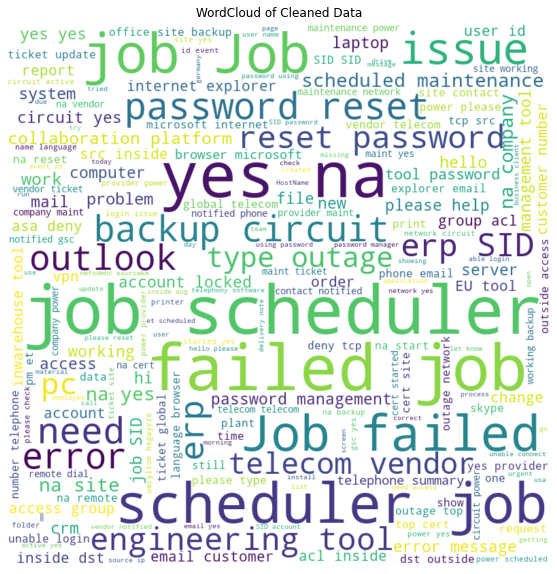

In [ ]:
# Generate word cloud of the lemmatized words
total_words = ""
total_words += " ".join(df_combined['Description_eng'])
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                min_font_size = 10).generate(total_words)
plt.figure(figsize=(10,10))
plt.title("WordCloud of Cleaned Data")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

(-0.5, 799.5, 799.5, -0.5)

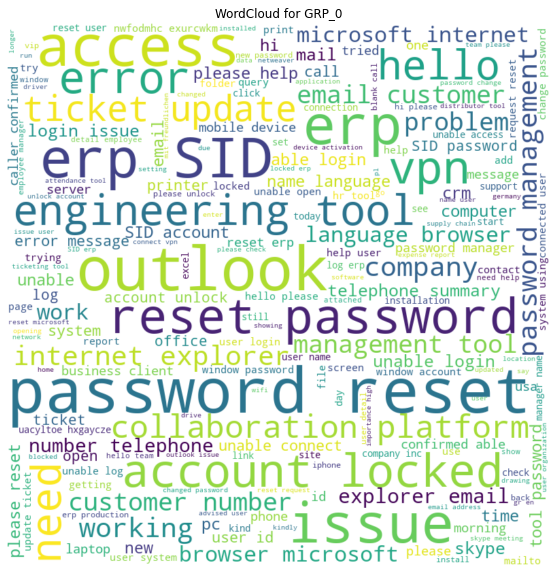

In [ ]:
#WordCloud for top 5 groups
#WordCloud for GRP_0
total_words = ""
total_words += " ".join(df_combined[df_combined['Assignment group']=='GRP_0']['Description_eng'])
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                min_font_size = 10).generate(total_words)
plt.figure(figsize=(10,10))
plt.title("WordCloud for GRP_0")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

(-0.5, 799.5, 799.5, -0.5)

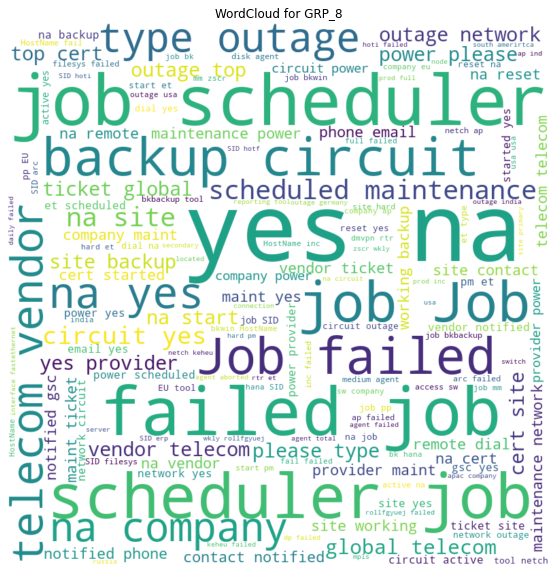

In [ ]:
#WordCloud for GRP_8
total_words = ""
total_words += " ".join(df_combined[df_combined['Assignment group']=='GRP_8']['Description_eng'])
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                min_font_size = 10).generate(total_words)
plt.figure(figsize=(10,10))
plt.title("WordCloud for GRP_8")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

(-0.5, 799.5, 799.5, -0.5)

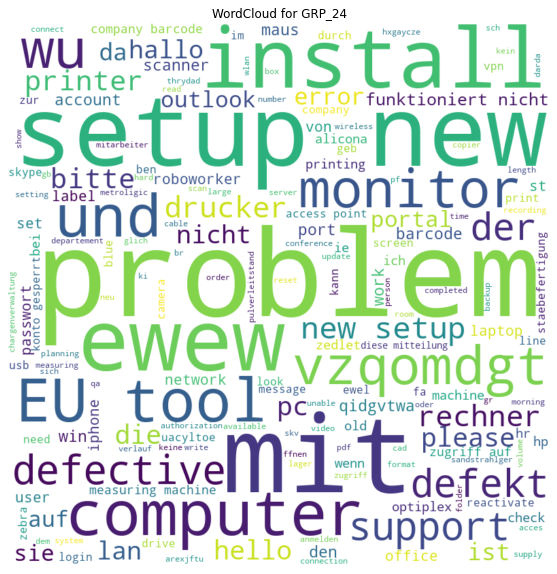

In [ ]:
#WordCloud for GRP_24
total_words = ""
total_words += " ".join(df_combined[df_combined['Assignment group']=='GRP_24']['Description_eng'])
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                min_font_size = 10).generate(total_words)
plt.figure(figsize=(10,10))
plt.title("WordCloud for GRP_24")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

(-0.5, 799.5, 799.5, -0.5)

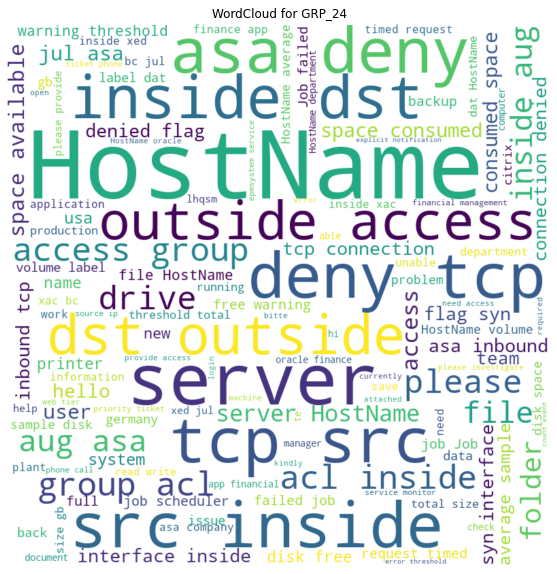

In [ ]:
#WordCloud for GRP_12
total_words = ""
total_words += " ".join(df_combined[df_combined['Assignment group']=='GRP_12']['Description_eng'])
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                min_font_size = 10).generate(total_words)
plt.figure(figsize=(10,10))
plt.title("WordCloud for GRP_24")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

(-0.5, 799.5, 799.5, -0.5)

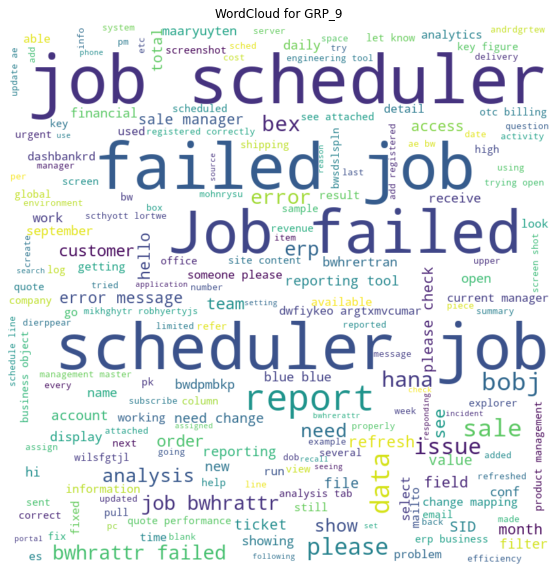

In [ ]:
#WordCloud for GRP_9
total_words = ""
total_words += " ".join(df_combined[df_combined['Assignment group']=='GRP_9']['Description_eng'])
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                min_font_size = 10).generate(total_words)
plt.figure(figsize=(10,10))
plt.title("WordCloud for GRP_9")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

**Class Imbalance**

In [ ]:
# As we saw earlier, there is a huge class imbalance as 'grp_0' has most of the tickets
# Let us see frequency distribution of all the 74 groups

group_freq_dict = dict(df_combined['Assignment group'].value_counts())

groups_df = pd.DataFrame.from_dict(group_freq_dict, orient = 'index', columns = ['Frequency'])
groups_df['Percentage freq'] = groups_df['Frequency']/ groups_df['Frequency'].sum() * 100
groups_df['Cumulative percentage'] = groups_df['Percentage freq'].cumsum(axis=0)


In [ ]:
# Sample data of groups
groups_df.head(50)    # Represents groups in descending order of frequency

,Frequency,Percentage freq,Cumulative percentage
GRP_0,3976,46.776471,46.776471
GRP_8,661,7.776471,54.552941
GRP_24,289,3.400000,57.952941
GRP_12,257,3.023529,60.976471
GRP_9,252,2.964706,63.941176
GRP_2,241,2.835294,66.776471
GRP_19,215,2.529412,69.305882
GRP_3,200,2.352941,71.658824
GRP_6,184,2.164706,73.823529
GRP_13,145,1.705882,75.529412


In [ ]:
# Since we have the cumulative percentage of frequencies, we can consider 90th percentile as a threshold
# At 90th percentile, 62 is the frequency
# So, we can consider groups with >=62 frequency individually and put all other groups into 'misc_grp' as they have less number of tickets each

misc_grp = list(dict(filter(lambda x: x[1] < 62 , group_freq_dict.items())))
print(misc_grp)

['GRP_26', 'GRP_40', 'GRP_28', 'GRP_41', 'GRP_15', 'GRP_30', 'GRP_42', 'GRP_20', 'GRP_45', 'GRP_22', 'GRP_1', 'GRP_11', 'GRP_21', 'GRP_47', 'GRP_62', 'GRP_23', 'GRP_48', 'GRP_60', 'GRP_39', 'GRP_27', 'GRP_37', 'GRP_44', 'GRP_36', 'GRP_50', 'GRP_65', 'GRP_53', 'GRP_52', 'GRP_51', 'GRP_55', 'GRP_59', 'GRP_49', 'GRP_46', 'GRP_43', 'GRP_66', 'GRP_32', 'GRP_56', 'GRP_58', 'GRP_68', 'GRP_38', 'GRP_63', 'GRP_72', 'GRP_57', 'GRP_71', 'GRP_69', 'GRP_54', 'GRP_70', 'GRP_64', 'GRP_73', 'GRP_67', 'GRP_61', 'GRP_35']


In [ ]:
# We shall edit the datset and retain only final groups being considered
#df_combined = df_combined[df_combined['Assignment group'].isin(Final_groups)]
df_combined['Assignment group'] = df_combined['Assignment group'].apply(lambda x : 'GRP_misc' if x in misc_grp else x)
df_combined['Assignment group'].unique()

array(['GRP_0', 'GRP_misc', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_12', 'GRP_13', 'GRP_14', 'GRP_16',
       'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2', 'GRP_24', 'GRP_25',
       'GRP_29', 'GRP_31', 'GRP_33', 'GRP_34'], dtype=object)

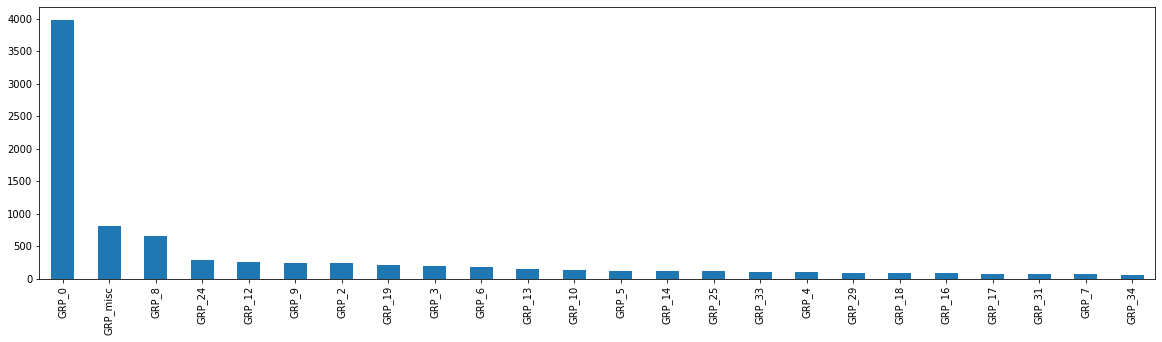

In [ ]:
# Visualization of groups

new_groups = df_combined['Assignment group'].value_counts().sort_values(ascending = False)
new_groups.plot(kind='bar', figsize=(20,5))

In [ ]:
# Total number of groups after regrouping
print("Total number of groups after regrouping : ", len(df_combined['Assignment group'].value_counts()))

Total number of groups after regrouping :  24


**Label Encoder**

In [ ]:
# Label encoding the target column 'Assignment group'
encoder = LabelEncoder()
df_combined['GroupsEncoded'] = encoder.fit_transform(df_combined['Assignment group'])
groups_len = len(encoder.classes_)

In [ ]:
# Checking sample of dataset
df_combined.head(5)

,Description,Assignment group,Language,Description_eng,GroupsEncoded
0,login issue verified user details employee man...,GRP_0,english,login issue user detail employee manager name ...,0
1,hello team my meetings skype meetings etc are...,GRP_0,english,hello team meeting skype meeting etc appearing...,0
2,cant log in to vpn hi cannot log on to vpn best,GRP_0,english,cant log vpn hi cannot log vpn,0
3,unable to access hr tool page,GRP_0,english,unable access hr tool page,0
4,skype error,GRP_0,norwegian,skype error,0


In [ ]:
df_combined_2 = df_combined.copy() 

In [ ]:
df_combined_3 = df_combined.copy() 

## **Bag of Words Model**

In [ ]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_combined.Description_eng.values, df_combined.GroupsEncoded.values, test_size=0.20, random_state=3)

# Create a table to compare results of machine learning models
compare_results_bow = pd.DataFrame(columns=['Algorithm Name', 'Accuracy', 'F1 Score'])

# Fit a count vectorizer on X_train and X_test 
vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)



In [ ]:
# Logistic Regression 

model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state = 3)
model.fit(X_train_bow,y_train)
y_predict = model.predict(X_test_bow) #predict on test
acc_score_lr = metrics.accuracy_score(y_test, y_predict)
f_sc_lr = metrics.f1_score(y_test, y_predict, average='weighted', labels=np.unique(y_predict))
compare_results_bow = compare_results_bow.append({'Algorithm Name': 'Logistic Regression', 'Accuracy': acc_score_lr,'F1 Score': f_sc_lr}, ignore_index=True)
print("Train Score is", model.score(X_train_bow, y_train))
print('Test Score is', metrics.accuracy_score(y_test, y_predict))

Train Score is 0.9117647058823529
Test Score is 0.6758823529411765


In [ ]:
# Naive Bayes

model = MultinomialNB()
model.fit(X_train_bow,y_train)
y_predict = model.predict(X_test_bow) #predict on test
acc_score_nb = metrics.accuracy_score(y_test, y_predict)
f_sc_nb = metrics.f1_score(y_test, y_predict, average='weighted', labels=np.unique(y_predict))
compare_results_bow = compare_results_bow.append({'Algorithm Name': 'Naive Bayes', 'Accuracy': acc_score_nb,'F1 Score': f_sc_nb}, ignore_index=True)
print("Train Score is", model.score(X_train_bow, y_train))
print('Test Score is',metrics.accuracy_score(y_test, y_predict))

Train Score is 0.7870588235294118
Test Score is 0.6047058823529412


In [ ]:
# Decision Tree

model = DecisionTreeClassifier(criterion = 'gini', random_state=3, class_weight='balanced' )
model.fit(X_train_bow,y_train)
y_predict = model.predict(X_test_bow) #predict on test
acc_score_dt = metrics.accuracy_score(y_test, y_predict)
f_sc_dt = metrics.f1_score(y_test, y_predict, average='weighted', labels=np.unique(y_predict))
compare_results_bow = compare_results_bow.append({'Algorithm Name': 'Decision Tree', 'Accuracy': acc_score_dt,'F1 Score': f_sc_dt}, ignore_index=True)
print("Train Score is", model.score(X_train_bow, y_train))
print('Test Score is',metrics.accuracy_score(y_test, y_predict))

Train Score is 0.929264705882353
Test Score is 0.5576470588235294


In [ ]:
# Random Forest

model = RandomForestClassifier(n_estimators = 50, random_state=3,max_features=12, class_weight='balanced')
model.fit(X_train_bow,y_train)
y_predict = model.predict(X_test_bow) #predict on test
acc_score_rf = metrics.accuracy_score(y_test, y_predict)
f_sc_rf = metrics.f1_score(y_test, y_predict, average='weighted', labels=np.unique(y_predict))
compare_results_bow = compare_results_bow.append({'Algorithm Name': 'Random Forest', 'Accuracy': acc_score_rf,'F1 Score': f_sc_rf}, ignore_index=True)
print("Train Score is", model.score(X_train_bow, y_train))
print('Test Score is',metrics.accuracy_score(y_test, y_predict))

Train Score is 0.9373529411764706
Test Score is 0.6305882352941177


In [ ]:
# Support Vector Classifier

model = SVC(random_state=3, class_weight='balanced')
model.fit(X_train_bow,y_train)
y_predict = model.predict(X_test_bow) #predict on test
acc_score_sv = metrics.accuracy_score(y_test, y_predict)
f_sc_sv = metrics.f1_score(y_test, y_predict, average='weighted', labels=np.unique(y_predict))
compare_results_bow = compare_results_bow.append({'Algorithm Name': 'Support Vector Classifier', 'Accuracy': acc_score_sv,'F1 Score': f_sc_sv}, ignore_index=True)
print("Train Score is", model.score(X_train_bow, y_train))
print('Test Score is',metrics.accuracy_score(y_test, y_predict))

Train Score is 0.7082352941176471
Test Score is 0.5458823529411765


## **Bag of Word Results**

In [ ]:
compare_results_bow.sort_values(by='Accuracy', ascending=False)

,Algorithm Name,Accuracy,F1 Score
0,Logistic Regression,0.675882,0.671320
3,Random Forest,0.630588,0.574109
1,Naive Bayes,0.604706,0.546866
2,Decision Tree,0.557647,0.573420
4,Support Vector Classifier,0.545882,0.584584


## **Vectorizer Model - TF-IDF**

In [ ]:
# Settings that you use for count vectorizer will go here 
tfidf_vectorizer=TfidfVectorizer(use_idf=True) 
 
# Just send in all your docs here 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(df_combined['Description_eng'])
# Get the first vector out (for the first document) 
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0] 
 
# Place tf-idf values in a pandas data frame 
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"]) 
df.sort_values(by=["tfidf"],ascending=False)
X = tfidf_vectorizer_vectors
y = np.asarray(df_combined['GroupsEncoded'])
tfidf_vector_X = tfidf_vectorizer_vectors.toarray()
tfidf_vector_X = tfidf_vector_X[:, :, None] 

In [ ]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.3, random_state = 1)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
compare_results_tf = pd.DataFrame(columns=['Algorithm Name', 'Accuracy', 'F1 Score'])

(5950, 3626) (5950,) (2550, 3626) (2550,)


In [ ]:
# Logistic Regression 

model = LogisticRegression(solver='liblinear',  random_state = 4)
model.fit(X_train,y_train)
y_predict = model.predict(X_test) #predict on test
acc_score_lr = metrics.accuracy_score(y_test, y_predict)
f_sc_lr = metrics.f1_score(y_test, y_predict, average='weighted', labels=np.unique(y_predict))
compare_results_tf = compare_results_tf.append({'Algorithm Name': 'Logistic Regression', 'Accuracy': acc_score_lr,'F1 Score': f_sc_lr}, ignore_index=True)
print("Train Score is", model.score(X_train, y_train))
print('Test Score is',metrics.accuracy_score(y_test, y_predict))

Train Score is 0.7031932773109244
Test Score is 0.6352941176470588


In [ ]:
# Naive Bayes

model = MultinomialNB()
model.fit(X_train,y_train)
y_predict = model.predict(X_test) #predict on test
acc_score_nb = metrics.accuracy_score(y_test, y_predict)
f_sc_nb = metrics.f1_score(y_test, y_predict, average='weighted', labels=np.unique(y_predict))
compare_results_tf = compare_results_tf.append({'Algorithm Name': 'Naive Bayes', 'Accuracy': acc_score_nb,'F1 Score': f_sc_nb}, ignore_index=True)
print("Train Score is", model.score(X_train, y_train))
print('Test Score is',metrics.accuracy_score(y_test, y_predict))

Train Score is 0.593781512605042
Test Score is 0.571764705882353


In [ ]:
# Decision Tree

model = DecisionTreeClassifier(criterion = 'gini', random_state=3)
model.fit(X_train,y_train)
y_predict = model.predict(X_test) #predict on test
acc_score_dt = metrics.accuracy_score(y_test, y_predict)
f_sc_dt = metrics.f1_score(y_test, y_predict, average='weighted', labels=np.unique(y_predict))
compare_results_tf = compare_results_tf.append({'Algorithm Name': 'Decision Tree', 'Accuracy': acc_score_dt,'F1 Score': f_sc_dt}, ignore_index=True)
print("Train Score is", model.score(X_train, y_train))
print('Test Score is',metrics.accuracy_score(y_test, y_predict))

Train Score is 0.9489075630252101
Test Score is 0.5980392156862745


In [ ]:
# Random Forest

model = RandomForestClassifier(n_estimators = 50, random_state=3,max_features=12)
model.fit(X_train,y_train)
y_predict = model.predict(X_test) #predict on test
acc_score_rf = metrics.accuracy_score(y_test, y_predict)
f_sc_rf = metrics.f1_score(y_test, y_predict, average='weighted', labels=np.unique(y_predict))
compare_results_tf = compare_results_tf.append({'Algorithm Name': 'Random Forest', 'Accuracy': acc_score_rf,'F1 Score': f_sc_rf}, ignore_index=True)
print("Train Score is", model.score(X_train, y_train))
print('Test Score is',metrics.accuracy_score(y_test, y_predict))

Train Score is 0.9487394957983193
Test Score is 0.6509803921568628


In [ ]:
# Support Vector Classifier

model = SVC(random_state=3)
model.fit(X_train,y_train)
y_predict = model.predict(X_test) #predict on test
acc_score_sv = metrics.accuracy_score(y_test, y_predict)
f_sc_sv = metrics.f1_score(y_test, y_predict, average='weighted', labels=np.unique(y_predict))
compare_results_tf = compare_results_tf.append({'Algorithm Name': 'Support Vector Classifier', 'Accuracy': acc_score_sv,'F1 Score': f_sc_sv}, ignore_index=True)
print("Train Score is", model.score(X_train, y_train))
print('Test Score is',metrics.accuracy_score(y_test, y_predict))

Train Score is 0.8480672268907563
Test Score is 0.6462745098039215


## **Vectorizer Model - TF-IDF - Results**

In [ ]:
compare_results_tf.sort_values(by='Accuracy', ascending=False)

,Algorithm Name,Accuracy,F1 Score
3,Random Forest,0.650980,0.600856
4,Support Vector Classifier,0.646275,0.591506
0,Logistic Regression,0.635294,0.588296
2,Decision Tree,0.598039,0.586981
1,Naive Bayes,0.571765,0.574179


## **Topic modelling using Gensim library**

In [ ]:
dataset = [d.split() for d in df_combined_2['Description_eng']]
# Create Dictionary
id2word = corpora.Dictionary(dataset)

# Create Corpus
texts = dataset

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
# Create an LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=50, 
                                           random_state=32,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
lda_model.print_topics()
doc_lda = lda_model[corpus]

In [ ]:
x=lda_model.show_topics(num_topics=50, num_words=10,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

#Below Code Prints Topics and Words
for topic,words in topics_words:
    print(str(topic)+ "::"+ str(words))
print()

lda_words = ""
 
for topic,words in topics_words:
    lda_words += " ".join(words)


0::['open', 'business', 'client', 'longer', 'current', 'ie', 'username', 'boot', 'pz', 'auto']
1::['access', 'screen', 'company', 'report', 'denied', 'ap', 'sw', 'required', 'submit', 'switch']
2::['message', 'crm', 'getting', 'programdnty', 'installation', 'click', 'condition', 'sending', 'hour', 'dynamic']
3::['urgent', 'net', 'want', 'logon', 'allow', 'vip', 'yesterday', 'forward', 'put', 'property']
4::['ticket', 'update', 'plant', 'priority', 'delivery', 'note', 'post', 'good', 'receipt', 'info']
5::['attachment', 'warehouse', 'gr', 'mm', 'restore', 'toolmail', 'ship', 'ir', 'kds', 'johthryugftyson']
6::['error', 'outlook', 'request', 'work', 'm', 'fix', 'engine', 'recently', 'logging', 'responding']
7::['job', 'scheduler', 'Job', 'failed', 'fail', 'bkwin', 'heu', 'snp', 'regen', 'hotf']
8::['u', 'e', 'platform', 'collaboration', 'c', 'reference', 'go', 'include', 'project', 'lean']
9::['inside', 'sale', 'mail', 'could', 'internal', 'item', 'org', 'wifi', 'rpc', 'package']
10::['i

In [ ]:
for i, text in enumerate(df_combined_2['Description_eng']):
  df_combined_2.at[i,'Description_eng'] = " ".join(word for word in text.split(' ') if word in lda_words)

In [ ]:
# Settings that you use for count vectorizer will go here 
tfidf_vectorizer=TfidfVectorizer(use_idf=True) 
 
# Just send in all your docs here 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(df_combined_2['Description_eng'])
# Get the first vector out (for the first document) 
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0] 
 
# Place tf-idf values in a pandas data frame 
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"]) 
df.sort_values(by=["tfidf"],ascending=False)
X = tfidf_vectorizer_vectors
y = np.asarray(df_combined_2['GroupsEncoded'])
tfidf_vector_X = tfidf_vectorizer_vectors.toarray()
tfidf_vector_X = tfidf_vector_X[:, :, None] 

In [ ]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.3, random_state = 1)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
compare_results_lda = pd.DataFrame(columns=['Algorithm Name', 'Accuracy', 'F1 Score'])

(5950, 765) (5950,) (2550, 765) (2550,)


In [ ]:
# Logistic Regression 

model = LogisticRegression(solver='liblinear', random_state = 3)
model.fit(X_train,y_train)
y_predict = model.predict(X_test) #predict on test
acc_score_lr = metrics.accuracy_score(y_test, y_predict)
f_sc_lr = metrics.f1_score(y_test, y_predict, average='weighted', labels=np.unique(y_predict))
compare_results_lda = compare_results_lda.append({'Algorithm Name': 'Logistic Regression', 'Accuracy': acc_score_lr,'F1 Score': f_sc_lr}, ignore_index=True)
print("Train Score is", model.score(X_train, y_train))
print('Test Score is', metrics.accuracy_score(y_test, y_predict))

Train Score is 0.6815126050420168
Test Score is 0.6321568627450981


In [ ]:
# Naive Bayes

model = MultinomialNB()
model.fit(X_train,y_train)
y_predict = model.predict(X_test) #predict on test
acc_score_nb = metrics.accuracy_score(y_test, y_predict)
f_sc_nb = metrics.f1_score(y_test, y_predict, average='weighted', labels=np.unique(y_predict))
compare_results_lda = compare_results_lda.append({'Algorithm Name': 'Naive Bayes', 'Accuracy': acc_score_nb,'F1 Score': f_sc_nb}, ignore_index=True)
print("Train Score is", model.score(X_train, y_train))
print('Test Score is',metrics.accuracy_score(y_test, y_predict))

Train Score is 0.6047058823529412
Test Score is 0.5929411764705882


In [ ]:
# Decision Tree

model = DecisionTreeClassifier(criterion = 'gini', random_state=3)
model.fit(X_train,y_train)
y_predict = model.predict(X_test) #predict on test
acc_score_dt = metrics.accuracy_score(y_test, y_predict)
f_sc_dt = metrics.f1_score(y_test, y_predict, average='weighted', labels=np.unique(y_predict))
compare_results_lda = compare_results_lda.append({'Algorithm Name': 'Decision Tree', 'Accuracy': acc_score_dt,'F1 Score': f_sc_dt}, ignore_index=True)
print("Train Score is", model.score(X_train, y_train))
print('Test Score is',metrics.accuracy_score(y_test, y_predict))

Train Score is 0.9347899159663866
Test Score is 0.5835294117647059


In [ ]:
# Random Forest

model = RandomForestClassifier(n_estimators = 50, random_state=3,max_features=12)
model.fit(X_train,y_train)
y_predict = model.predict(X_test) #predict on test
acc_score_rf = metrics.accuracy_score(y_test, y_predict)
f_sc_rf = metrics.f1_score(y_test, y_predict, average='weighted', labels=np.unique(y_predict))
compare_results_lda = compare_results_lda.append({'Algorithm Name': 'Random Forest', 'Accuracy': acc_score_rf,'F1 Score': f_sc_rf}, ignore_index=True)
print("Train Score is", model.score(X_train, y_train))
print('Test Score is',metrics.accuracy_score(y_test, y_predict))

Train Score is 0.9347899159663866
Test Score is 0.6541176470588236


In [ ]:
# Support Vector Classifier

model = SVC(random_state=3, class_weight='balanced')
model.fit(X_train,y_train)
y_predict = model.predict(X_test) #predict on test
acc_score_sv = metrics.accuracy_score(y_test, y_predict)
f_sc_sv = metrics.f1_score(y_test, y_predict, average='weighted', labels=np.unique(y_predict))
compare_results_lda = compare_results_lda.append({'Algorithm Name': 'Support Vector Classifier', 'Accuracy': acc_score_sv,'F1 Score': f_sc_sv}, ignore_index=True)
print("Train Score is", model.score(X_train, y_train))
print('Test Score is',metrics.accuracy_score(y_test, y_predict))

Train Score is 0.7127731092436975
Test Score is 0.5305882352941177


## **Topic modelling using Gensim library - Results**

In [ ]:
compare_results_lda.sort_values(by='Accuracy', ascending=False)

,Algorithm Name,Accuracy,F1 Score
3,Random Forest,0.654118,0.604155
0,Logistic Regression,0.632157,0.579175
1,Naive Bayes,0.592941,0.569293
2,Decision Tree,0.583529,0.570809
4,Support Vector Classifier,0.530588,0.566826


## **Embedding Model - GloVe**

**X and y**

In [ ]:
# Assigning target column
y = np.asarray(df_combined['GroupsEncoded'])

max_features = 3500
maxlen = 100
embedding_size = 50

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features, split=' ') # initialize tokenizer object with number of words as 3500
tokenizer.fit_on_texts(df_combined['Description_eng'].values) # Fit the tokenizer object on Description column
X = tokenizer.texts_to_sequences(df_combined['Description_eng'].values) # Convert the text to sequence
X = tf.keras.preprocessing.sequence.pad_sequences(X,maxlen=maxlen) #Pad each example with a maximum length

**Glove Embedding**

Datasets
Utilizing indexed words to replace words by index. This makes the dataset numerical and keras readable.

In [ ]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

3651


In [ ]:
EMBEDDING_FILE = './glove.6B.50d.txt'
embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    #print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd,dtype ='float32')
    #print(embd)
    embeddings[word] = embd

In [ ]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, embedding_size))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix.shape  # Embedding matrix shape

(3651, 50)

In [ ]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5950, 100) (5950,) (2550, 100) (2550,)


In [ ]:
compare_results_vec = pd.DataFrame(columns=['Algorithm Name', 'Accuracy', 'F1 Score'])

In [ ]:
# Logistic Regression 

model = LogisticRegression(solver='liblinear',  random_state = 4) 
#Class_weight parameter is removed since it gave very low accuracy(9%)
model.fit(X_train,y_train)
y_predict = model.predict(X_test) #predict on test
acc_score_lr = metrics.accuracy_score(y_test, y_predict)
f_sc_lr = metrics.f1_score(y_test, y_predict, average='weighted', labels=np.unique(y_predict))
compare_results_vec = compare_results_vec.append({'Algorithm Name': 'Logistic Regression', 'Accuracy': acc_score_lr,'F1 Score': f_sc_lr}, ignore_index=True)
print("Train Score is", model.score(X_train, y_train))
print('Test Score is',metrics.accuracy_score(y_test, y_predict))

Train Score is 0.5104201680672269
Test Score is 0.46509803921568627


In [ ]:
# Naive Bayes

model = MultinomialNB()
model.fit(X_train,y_train)
y_predict = model.predict(X_test) #predict on test
acc_score_nb = metrics.accuracy_score(y_test, y_predict)
f_sc_nb = metrics.f1_score(y_test, y_predict, average='weighted', labels=np.unique(y_predict))
compare_results_vec = compare_results_vec.append({'Algorithm Name': 'Naive Bayes', 'Accuracy': acc_score_nb,'F1 Score': f_sc_nb}, ignore_index=True)
print("Train Score is", model.score(X_train, y_train))
print('Test Score is',metrics.accuracy_score(y_test, y_predict))

Train Score is 0.08571428571428572
Test Score is 0.07411764705882352


In [ ]:
# Decision Tree

model = DecisionTreeClassifier(criterion = 'gini', random_state=3, class_weight='balanced' )
model.fit(X_train,y_train)
y_predict = model.predict(X_test) #predict on test
acc_score_dt = metrics.accuracy_score(y_test, y_predict)
f_sc_dt = metrics.f1_score(y_test, y_predict, average='weighted', labels=np.unique(y_predict))
compare_results_vec = compare_results_vec.append({'Algorithm Name': 'Decision Tree', 'Accuracy': acc_score_dt,'F1 Score': f_sc_dt}, ignore_index=True)
print("Train Score is", model.score(X_train, y_train))
print('Test Score is',metrics.accuracy_score(y_test, y_predict))

Train Score is 0.9260504201680673
Test Score is 0.42980392156862746


In [ ]:
# Random Forest

model = RandomForestClassifier(n_estimators = 50, random_state=3,max_features=12, class_weight='balanced')
model.fit(X_train,y_train)
y_predict = model.predict(X_test) #predict on test
acc_score_rf = metrics.accuracy_score(y_test, y_predict)
f_sc_rf = metrics.f1_score(y_test, y_predict, average='weighted', labels=np.unique(y_predict))
compare_results_vec = compare_results_vec.append({'Algorithm Name': 'Random Forest', 'Accuracy': acc_score_rf,'F1 Score': f_sc_rf}, ignore_index=True)
print("Train Score is", model.score(X_train, y_train))
print('Test Score is',metrics.accuracy_score(y_test, y_predict))

Train Score is 0.92890756302521
Test Score is 0.5611764705882353


In [ ]:
# Support Vector Classifier

model = SVC(random_state=3)
#Removed class_weight param since it gave very low accuracy(12%)
model.fit(X_train,y_train)
y_predict = model.predict(X_test) #predict on test
acc_score_sv = metrics.accuracy_score(y_test, y_predict)
f_sc_sv = metrics.f1_score(y_test, y_predict, average='weighted', labels=np.unique(y_predict))
compare_results_vec = compare_results_vec.append({'Algorithm Name': 'Support Vector Classifier', 'Accuracy': acc_score_sv,'F1 Score': f_sc_sv}, ignore_index=True)
print("Train Score is", model.score(X_train, y_train))
print('Test Score is',metrics.accuracy_score(y_test, y_predict))

Train Score is 0.5736134453781513
Test Score is 0.49058823529411766


## **Embedding Model - GloVe - Results**

In [ ]:
compare_results_vec.sort_values(by='Accuracy', ascending=False)

,Algorithm Name,Accuracy,F1 Score
3,Random Forest,0.561176,0.520534
4,Support Vector Classifier,0.490588,0.497578
0,Logistic Regression,0.465098,0.337897
2,Decision Tree,0.429804,0.436746
1,Naive Bayes,0.074118,0.050693


## **Neural Networks**

In [ ]:
# Convert target value to categorical value
y_train_new = to_categorical(y_train, 24)
y_test_new = to_categorical(y_test, 24)

print(y_train_new.shape, y_test_new.shape)

(5950, 24) (2550, 24)


**1. Bidirectional LSTM (Long Short Term Memory)**

In [ ]:
# Create a Bidirectional LSTM model
# LSTM nodes=128

model_1 = Sequential()
model_1.add(Embedding(input_dim = num_words, output_dim = embedding_size, input_length = maxlen))
model_1.add(Bidirectional(LSTM(64, activation='relu', dropout = 0.2, recurrent_dropout = 0.2, return_sequences=True)))
model_1.add(Flatten())
model_1.add(Dense(24, activation = 'softmax'))

In [ ]:
# Compile the model
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           182550    
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 128)          58880     
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0         
_________________________________________________________________
dense (Dense)                (None, 24)                307224    
Total params: 548,654
Trainable params: 548,654
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Fit the model to the training set
batch_size = 32
model1_history = model_1.fit(X_train, y_train_new, epochs = 10, batch_size=batch_size, verbose = 1, validation_split=0.2)

Epoch 1/10
149/149 [==============================] - 42s 283ms/step - loss: 458615619584.0000 - accuracy: 0.5029 - val_loss: 1.6364 - val_accuracy: 0.5513
Epoch 2/10
149/149 [==============================] - 41s 275ms/step - loss: 34632.4922 - accuracy: 0.5565 - val_loss: 1.5409 - val_accuracy: 0.5681
Epoch 3/10
149/149 [==============================] - 42s 279ms/step - loss: 45.5836 - accuracy: 0.6067 - val_loss: 1.4669 - val_accuracy: 0.5882
Epoch 4/10
149/149 [==============================] - 41s 275ms/step - loss: 6.9635 - accuracy: 0.6357 - val_loss: 1.4305 - val_accuracy: 0.6000
Epoch 5/10
149/149 [==============================] - 41s 279ms/step - loss: 1.1447 - accuracy: 0.6580 - val_loss: 1.4145 - val_accuracy: 0.6176
Epoch 6/10
149/149 [==============================] - 41s 276ms/step - loss: 1.0320 - accuracy: 0.6882 - val_loss: 1.4021 - val_accuracy: 0.6269
Epoch 7/10
149/149 [==============================] - 41s 276ms/step - loss: 0.9433 - accuracy: 0.7212 - val_loss:

In [ ]:
# Evaluating the test accuracy and loss
model1_score, model1_acc = model_1.evaluate(X_test, y_test_new, verbose = 1, batch_size = batch_size)
print("score: %.2f" % (model1_score))
print("acc: %.2f" % (model1_acc))

80/80 [==============================] - 2s 29ms/step - loss: 1.6919 - accuracy: 0.6365
score: 1.69
acc: 0.64


In [ ]:
# Predict the target value on test data
y_pred = model_1.predict(X_test)

In [ ]:
# Print the classification report
print(metrics.classification_report(y_test_new, y_pred.round()))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1195
           1       0.89      0.35      0.50        46
           2       0.63      0.45      0.53        91
           3       0.64      0.15      0.25        46
           4       0.71      0.12      0.21        40
           5       0.35      0.30      0.32        20
           6       0.86      0.95      0.90        20
           7       0.20      0.03      0.06        29
           8       0.45      0.07      0.12        71
           9       0.45      0.31      0.37        62
          10       0.84      0.57      0.68        93
          11       0.33      0.08      0.13        24
          12       0.00      0.00      0.00        38
          13       0.33      0.02      0.04        52
          14       0.00      0.00      0.00        15
          15       0.00      0.00      0.00        35
          16       0.00      0.00      0.00        21
          17       0.67    

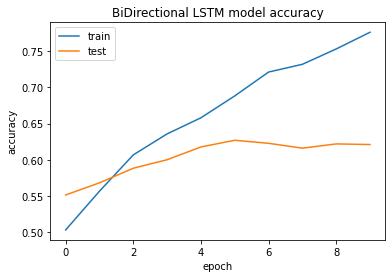

In [ ]:
# Plot a graph for train and test accuracies
plt.plot(model1_history.history['accuracy'])
plt.plot(model1_history.history['val_accuracy'])
#plt.plot(acc)

plt.title("BiDirectional LSTM"+' model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
compare_results_lstm = pd.DataFrame(columns=['Model Name', 'Training Accuracy', 'Test Accuracy'])

In [ ]:
index, acc_value = max(enumerate(model1_history.history['accuracy']), key=operator.itemgetter(1))
compare_results_lstm = compare_results_lstm.append({'Model Name': 'Bidirectional LSTM', 'Training Accuracy': model1_history.history['accuracy'][index],'Test Accuracy': model1_acc}, ignore_index=True)

**Fine Tuning Bidirectional LSTM**

**2. LSTM With Glove Embedding**

In [ ]:
# Create a Bidirectional LSTM model by including glove embedding matrix in the embedding layer
# LSTM nodes=128

model_2 = Sequential()
model_2.add(Embedding(input_dim = num_words, output_dim = embedding_size, weights=[embedding_matrix], input_length = maxlen))
model_2.add(Bidirectional(LSTM(128, activation='relu', dropout = 0.2, recurrent_dropout = 0.2, return_sequences=True)))
model_2.add(Flatten())
model_2.add(Dense(24, activation = 'softmax'))

In [ ]:
# Compile the model
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           182550    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 256)          183296    
_________________________________________________________________
flatten_1 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 24)                614424    
Total params: 980,270
Trainable params: 980,270
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Fit the model to the training set
batch_size = 32
model2_history = model_2.fit(X_train, y_train_new, validation_split = 0.2, epochs = 10, batch_size=batch_size, verbose = 1)

Epoch 1/10
149/149 [==============================] - 80s 540ms/step - loss: 2.1410 - accuracy: 0.5139 - val_loss: 1.6317 - val_accuracy: 0.5588
Epoch 2/10
149/149 [==============================] - 80s 535ms/step - loss: 4.7984 - accuracy: 0.5842 - val_loss: 1.5212 - val_accuracy: 0.5513
Epoch 3/10
149/149 [==============================] - 80s 537ms/step - loss: 1.2059 - accuracy: 0.6408 - val_loss: 1.4083 - val_accuracy: 0.5983
Epoch 4/10
149/149 [==============================] - 80s 537ms/step - loss: 1.0496 - accuracy: 0.6809 - val_loss: 1.3562 - val_accuracy: 0.6151
Epoch 5/10
149/149 [==============================] - 80s 536ms/step - loss: 0.9284 - accuracy: 0.7105 - val_loss: 1.4034 - val_accuracy: 0.6126
Epoch 6/10
149/149 [==============================] - 80s 537ms/step - loss: 0.8937 - accuracy: 0.7246 - val_loss: 1.3693 - val_accuracy: 0.6261
Epoch 7/10
149/149 [==============================] - 80s 537ms/step - loss: 1958.9196 - accuracy: 0.7181 - val_loss: 1.4001 - val

In [ ]:
# Evaluating the test accuracy and loss
model2_score, model2_acc = model_2.evaluate(X_test, y_test_new, verbose = 1, batch_size = batch_size)
print("score: %.2f" % (model2_score))
print("acc: %.2f" % (model2_acc))

80/80 [==============================] - 4s 51ms/step - loss: 1.4628 - accuracy: 0.6365
score: 1.46
acc: 0.64


In [ ]:
# Predict the target value on test data
y_pred_glove = model_2.predict(X_test)

In [ ]:
# Print the classification report
print(metrics.classification_report(y_test_new, y_pred_glove.round()))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84      1195
           1       0.76      0.28      0.41        46
           2       0.55      0.37      0.44        91
           3       0.62      0.11      0.19        46
           4       0.62      0.12      0.21        40
           5       0.33      0.05      0.09        20
           6       0.86      0.95      0.90        20
           7       0.45      0.17      0.25        29
           8       0.42      0.11      0.18        71
           9       0.63      0.27      0.38        62
          10       0.87      0.52      0.65        93
          11       0.42      0.42      0.42        24
          12       0.27      0.18      0.22        38
          13       0.15      0.04      0.06        52
          14       0.20      0.07      0.10        15
          15       0.00      0.00      0.00        35
          16       0.00      0.00      0.00        21
          17       0.50    

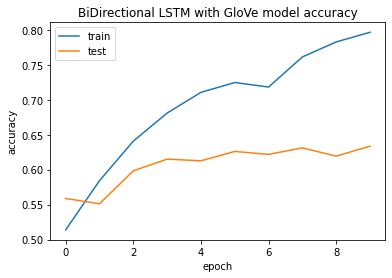

In [ ]:
# Plot a graph for train and test accuracies
plt.plot(model2_history.history['accuracy'])
plt.plot(model2_history.history['val_accuracy'])
#plt.plot(acc)

plt.title("BiDirectional LSTM with GloVe"+' model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
index, acc_value = max(enumerate(model2_history.history['accuracy']), key=operator.itemgetter(1))
compare_results_lstm = compare_results_lstm.append({'Model Name': ' LSTM With Glove Embedding', 'Training Accuracy': model2_history.history['accuracy'][index],'Test Accuracy': model2_acc}, ignore_index=True)

In [ ]:
compare_results_lstm 

,Model Name,Training Accuracy,Test Accuracy
0,Bidirectional LSTM,0.776260,0.636471
1,LSTM With Glove Embedding,0.796429,0.636471


**3. LSTM with Glove Embedding and Learning Rate change**

In [ ]:
# Create a Bidirectional LSTM model by including glove embedding matrix in the embedding layer
# LSTM nodes=128

model_3 = Sequential()
model_3.add(Embedding(input_dim = num_words, output_dim = embedding_size, weights=[embedding_matrix], input_length = maxlen))
model_3.add(Bidirectional(LSTM(128, activation='relu', dropout = 0.2, recurrent_dropout = 0.2, return_sequences=True)))
model_3.add(Flatten())
model_3.add(Dense(24, activation = 'softmax'))

In [ ]:
# Changing the learning rate of the optimizer 'adam'
optimizer = Adam(lr=1e-6, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model_3.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
# Using early stopping
stop = EarlyStopping(monitor="loss", patience=2, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=2, min_lr=1e-5, verbose=1, mode="min")

In [ ]:
model3_history = model_3.fit(x= X_train, y= y_train_new, validation_split=0.2, epochs=20, batch_size=32, verbose=1, callbacks=[stop, reduce_lr])

Epoch 1/10
149/149 [==============================] - 81s 546ms/step - loss: 2.7708 - accuracy: 0.4782 - val_loss: 2.7764 - val_accuracy: 0.4773
Epoch 2/10
149/149 [==============================] - 81s 545ms/step - loss: 2.7422 - accuracy: 0.4803 - val_loss: 2.7475 - val_accuracy: 0.4782
Epoch 3/10
149/149 [==============================] - 82s 548ms/step - loss: 2.7148 - accuracy: 0.4813 - val_loss: 2.7194 - val_accuracy: 0.4807
Epoch 4/10
149/149 [==============================] - 86s 577ms/step - loss: 2.6863 - accuracy: 0.4813 - val_loss: 2.6924 - val_accuracy: 0.4815
Epoch 5/10
149/149 [==============================] - 82s 553ms/step - loss: 2.6615 - accuracy: 0.4828 - val_loss: 2.6666 - val_accuracy: 0.4815
Epoch 6/10
149/149 [==============================] - 82s 547ms/step - loss: 2.6368 - accuracy: 0.4830 - val_loss: 2.6418 - val_accuracy: 0.4815
Epoch 7/10
149/149 [==============================] - 81s 543ms/step - loss: 2.6143 - accuracy: 0.4832 - val_loss: 2.6180 - val_ac

In [ ]:
model3_score,model3_acc = model_3.evaluate(X_test, y_test_new, verbose = 1, batch_size = 32)
print("score: %.2f" % (model3_score))
print("acc: %.2f" % (model3_acc))

80/80 [==============================] - 4s 53ms/step - loss: 2.5876 - accuracy: 0.4843
score: 2.59
acc: 0.48


In [ ]:
y_predict_lstm = model_3.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test_new, y_predict_lstm.round()))

              precision    recall  f1-score   support

           0       0.43      0.00      0.00      1195
           1       0.00      0.00      0.00        46
           2       0.00      0.00      0.00        91
           3       0.00      0.00      0.00        46
           4       0.00      0.00      0.00        40
           5       0.00      0.00      0.00        20
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00        29
           8       0.00      0.00      0.00        71
           9       0.00      0.00      0.00        62
          10       0.00      0.00      0.00        93
          11       0.00      0.00      0.00        24
          12       0.00      0.00      0.00        38
          13       0.00      0.00      0.00        52
          14       0.00      0.00      0.00        15
          15       0.00      0.00      0.00        35
          16       0.00      0.00      0.00        21
          17       0.00    

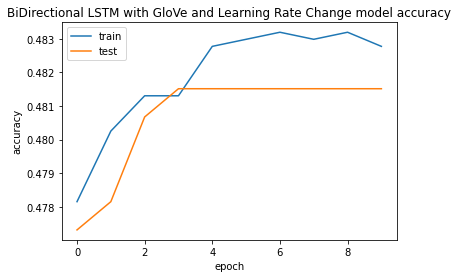

In [ ]:
# Plot a graph for train and test accuracies
plt.plot(model3_history.history['accuracy'])
plt.plot(model3_history.history['val_accuracy'])

plt.title("BiDirectional LSTM with GloVe and Learning Rate Change"+' model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
index, acc_value = max(enumerate(model3_history.history['accuracy']), key=operator.itemgetter(1))
compare_results_lstm = compare_results_lstm.append({'Model Name': 'LSTM with Glove Embedding and Learning Rate change', 'Training Accuracy': model3_history.history['accuracy'][index],'Test Accuracy': model3_acc}, ignore_index=True)

**4. LSTM With Glove Embedding and Regularizer**

In [ ]:
# Create a Bidirectional LSTM model by including glove embedding matrix in the embedding layer
# LSTM nodes=128

model_4 = Sequential()
model_4.add(Embedding(input_dim = num_words, output_dim = embedding_size, weights=[embedding_matrix], input_length = maxlen))
model_4.add(Bidirectional(LSTM(128, activation='relu', dropout = 0.2, recurrent_dropout = 0.2, kernel_regularizer = l2(0.001), return_sequences=True)))
model_4.add(Flatten())
model_4.add(Dense(24, activation = 'softmax'))

In [ ]:
# Compile the model
model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_4.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 50)           182550    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 100, 256)          183296    
_________________________________________________________________
flatten_4 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                614424    
Total params: 980,270
Trainable params: 980,270
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Fit the model to the training set
batch_size = 32
model4_history = model_4.fit(X_train, y_train_new, validation_split=0.2, epochs = 10, batch_size=batch_size, verbose = 1)

Epoch 1/10
149/149 [==============================] - 82s 549ms/step - loss: 4.4843 - accuracy: 0.5202 - val_loss: 1.9377 - val_accuracy: 0.5563
Epoch 2/10
149/149 [==============================] - 81s 541ms/step - loss: 2.0489 - accuracy: 0.5903 - val_loss: 1.5680 - val_accuracy: 0.5782
Epoch 3/10
149/149 [==============================] - 80s 539ms/step - loss: 1.2678 - accuracy: 0.6458 - val_loss: 1.4534 - val_accuracy: 0.5983
Epoch 4/10
149/149 [==============================] - 80s 540ms/step - loss: 1.1335 - accuracy: 0.6899 - val_loss: 1.4794 - val_accuracy: 0.6059
Epoch 5/10
149/149 [==============================] - 81s 540ms/step - loss: 1.0291 - accuracy: 0.7038 - val_loss: 1.4218 - val_accuracy: 0.6185
Epoch 6/10
149/149 [==============================] - 81s 544ms/step - loss: 0.9139 - accuracy: 0.7445 - val_loss: 1.4945 - val_accuracy: 0.6193
Epoch 7/10
149/149 [==============================] - 86s 575ms/step - loss: 0.8338 - accuracy: 0.7664 - val_loss: 1.4842 - val_ac

In [ ]:
# Evaluating the test accuracy and loss
model4_score, model4_acc = model_4.evaluate(X_test, y_test_new, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (model4_score))
print("acc: %.2f" % (model4_acc))

80/80 - 4s - loss: 1.5780 - accuracy: 0.6039
score: 1.58
acc: 0.60


In [ ]:
# Predict the target value on test data
y_pred_reg = model_4.predict(X_test)

In [ ]:
# Print the classification report
print(metrics.classification_report(y_test_new, y_pred_reg.round()))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1195
           1       0.76      0.28      0.41        46
           2       0.67      0.18      0.28        91
           3       0.67      0.04      0.08        46
           4       0.00      0.00      0.00        40
           5       0.44      0.20      0.28        20
           6       0.90      0.95      0.93        20
           7       0.25      0.07      0.11        29
           8       0.45      0.07      0.12        71
           9       0.35      0.32      0.34        62
          10       0.83      0.52      0.64        93
          11       0.57      0.17      0.26        24
          12       1.00      0.03      0.05        38
          13       0.00      0.00      0.00        52
          14       0.00      0.00      0.00        15
          15       0.25      0.03      0.05        35
          16       0.00      0.00      0.00        21
          17       0.50    

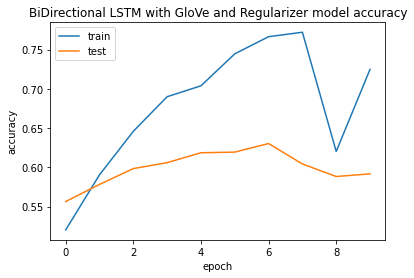

In [ ]:
# Plot a graph for train and test accuracies
plt.plot(model4_history.history['accuracy'])
plt.plot(model4_history.history['val_accuracy'])

plt.title("BiDirectional LSTM with GloVe and Regularizer"+' model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
index, acc_value = max(enumerate(model4_history.history['accuracy']), key=operator.itemgetter(1))
compare_results_lstm = compare_results_lstm.append({'Model Name': 'LSTM With Glove Embedding and Regularizer', 'Training Accuracy': model4_history.history['accuracy'][index],'Test Accuracy': model4_acc}, ignore_index=True)

**GRU**

**1. GRU with Glove Embedding**

In [ ]:
# Create a basic GRU model by changing nodes = 128

model_g1 = Sequential()
model_g1.add(Embedding(input_dim = num_words, output_dim = 50, weights=[embedding_matrix], input_length = maxlen))
model_g1.add(GRU(128, activation='relu', dropout = 0.2, recurrent_dropout = 0.2, return_sequences=True))
model_g1.add(Flatten())
model_g1.add(Dense(24, activation = 'softmax'))

In [ ]:
# Compile the model
model_g1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_g1.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 50)           182550    
_________________________________________________________________
gru (GRU)                    (None, 100, 128)          69120     
_________________________________________________________________
flatten_5 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 24)                307224    
Total params: 558,894
Trainable params: 558,894
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Fit the model to the training set
batch_size = 32
modelg1_history = model_g1.fit(X_train, y_train_new, validation_split=0.2, epochs = 10, batch_size=batch_size, verbose = 1)

Epoch 1/10
149/149 [==============================] - 35s 237ms/step - loss: 1.9292 - accuracy: 0.5170 - val_loss: 1.6954 - val_accuracy: 0.5361
Epoch 2/10
149/149 [==============================] - 35s 233ms/step - loss: 1.3812 - accuracy: 0.5918 - val_loss: 1.4497 - val_accuracy: 0.5798
Epoch 3/10
149/149 [==============================] - 35s 234ms/step - loss: 1.0857 - accuracy: 0.6710 - val_loss: 1.4303 - val_accuracy: 0.5966
Epoch 4/10
149/149 [==============================] - 35s 234ms/step - loss: 0.8600 - accuracy: 0.7284 - val_loss: 1.5553 - val_accuracy: 0.5992
Epoch 5/10
149/149 [==============================] - 35s 233ms/step - loss: 0.7161 - accuracy: 0.7718 - val_loss: 1.5325 - val_accuracy: 0.5891
Epoch 6/10
149/149 [==============================] - 35s 235ms/step - loss: 0.5991 - accuracy: 0.8109 - val_loss: 1.5500 - val_accuracy: 0.6210
Epoch 7/10
149/149 [==============================] - 35s 235ms/step - loss: 0.5207 - accuracy: 0.8450 - val_loss: 1.7010 - val_ac

In [ ]:
# Evaluating the test accuracy and loss
modelg1_score, modelg1_acc = model_g1.evaluate(X_test, y_test_new, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (modelg1_score))
print("acc: %.2f" % (modelg1_acc))

80/80 - 2s - loss: 1.8665 - accuracy: 0.6243
score: 1.87
acc: 0.62


In [ ]:
# Predict the target value on test data
y_pred_gru = model_g1.predict(X_test)

In [ ]:
# Print the classification report
print(metrics.classification_report(y_test_new, y_pred_gru.round()))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1195
           1       0.85      0.37      0.52        46
           2       0.55      0.42      0.47        91
           3       0.41      0.28      0.33        46
           4       0.33      0.10      0.15        40
           5       0.31      0.45      0.37        20
           6       0.81      0.85      0.83        20
           7       0.22      0.17      0.19        29
           8       0.49      0.24      0.32        71
           9       0.64      0.37      0.47        62
          10       0.76      0.70      0.73        93
          11       0.41      0.29      0.34        24
          12       0.42      0.13      0.20        38
          13       0.38      0.06      0.10        52
          14       0.12      0.27      0.16        15
          15       0.12      0.03      0.05        35
          16       0.25      0.05      0.08        21
          17       0.40    

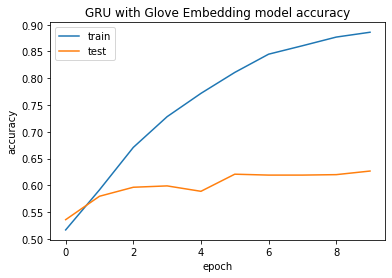

In [ ]:
# Plot a graph for train and test accuracies
plt.plot(modelg1_history.history['accuracy'])
plt.plot(modelg1_history.history['val_accuracy'])

plt.title("GRU with Glove Embedding"+' model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
index, acc_value = max(enumerate(modelg1_history.history['accuracy']), key=operator.itemgetter(1))
compare_results_lstm = compare_results_lstm.append({'Model Name': 'GRU with Glove Embedding', 'Training Accuracy': modelg1_history.history['accuracy'][index],'Test Accuracy': modelg1_acc}, ignore_index=True)

**2. GRU with Regularizer**

In [ ]:
# Create a basic GRU model with regularizer

model_g2 = Sequential()
model_g2.add(Embedding(input_dim = num_words, output_dim = 50, weights=[embedding_matrix], input_length = maxlen))
model_g2.add(GRU(128, activation='relu', dropout = 0.2, recurrent_dropout = 0.2, kernel_regularizer = l2(0.01), return_sequences=True))
model_g2.add(Flatten())
model_g2.add(Dense(24, activation = 'softmax'))

In [ ]:
# Compile the model
modelg2_history = model_g2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_g2.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 50)           182550    
_________________________________________________________________
gru_1 (GRU)                  (None, 100, 128)          69120     
_________________________________________________________________
flatten_6 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 24)                307224    
Total params: 558,894
Trainable params: 558,894
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Fit the model to the training set
batch_size = 32
modelg2_history = model_g2.fit(X_train, y_train_new, validation_split=0.2, epochs = 10, batch_size=batch_size, verbose = 1)

Epoch 1/10
149/149 [==============================] - 35s 235ms/step - loss: 2.2539 - accuracy: 0.5084 - val_loss: 1.7575 - val_accuracy: 0.5496
Epoch 2/10
149/149 [==============================] - 35s 233ms/step - loss: 1.5850 - accuracy: 0.5771 - val_loss: 1.6177 - val_accuracy: 0.5748
Epoch 3/10
149/149 [==============================] - 35s 234ms/step - loss: 1.3569 - accuracy: 0.6242 - val_loss: 1.5756 - val_accuracy: 0.5697
Epoch 4/10
149/149 [==============================] - 35s 238ms/step - loss: 1.1873 - accuracy: 0.6752 - val_loss: 1.5403 - val_accuracy: 0.5840
Epoch 5/10
149/149 [==============================] - 35s 236ms/step - loss: 1.0650 - accuracy: 0.7042 - val_loss: 1.5851 - val_accuracy: 0.6092
Epoch 6/10
149/149 [==============================] - 35s 236ms/step - loss: 0.9707 - accuracy: 0.7345 - val_loss: 1.5366 - val_accuracy: 0.6176
Epoch 7/10
149/149 [==============================] - 35s 236ms/step - loss: 0.8802 - accuracy: 0.7618 - val_loss: 1.5961 - val_ac

In [ ]:
# Evaluating the test accuracy and loss
modelg2_score, modelg2_acc = model_g2.evaluate(X_test, y_test_new, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (modelg2_score))
print("acc: %.2f" % (modelg2_acc))

80/80 - 2s - loss: 1.6462 - accuracy: 0.6180
score: 1.65
acc: 0.62


In [ ]:
# Predict the target value on test data
y_pred_gru_reg = model_g2.predict(X_test)

In [ ]:
# Print the classification report
print(metrics.classification_report(y_test_new, y_pred_gru_reg.round()))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1195
           1       0.84      0.35      0.49        46
           2       0.58      0.32      0.41        91
           3       0.47      0.20      0.28        46
           4       0.25      0.07      0.12        40
           5       0.25      0.35      0.29        20
           6       0.89      0.85      0.87        20
           7       0.08      0.03      0.05        29
           8       0.33      0.04      0.07        71
           9       0.68      0.24      0.36        62
          10       0.76      0.65      0.70        93
          11       0.50      0.25      0.33        24
          12       0.50      0.05      0.10        38
          13       0.18      0.08      0.11        52
          14       0.00      0.00      0.00        15
          15       0.00      0.00      0.00        35
          16       1.00      0.05      0.09        21
          17       0.58    

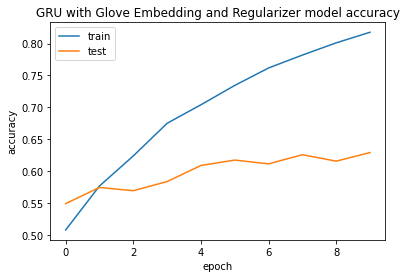

In [ ]:
# Plot a graph for train and test accuracies
plt.plot(modelg2_history.history['accuracy'])
plt.plot(modelg2_history.history['val_accuracy'])

plt.title("GRU with Glove Embedding and Regularizer"+' model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
index, acc_value = max(enumerate(modelg2_history.history['accuracy']), key=operator.itemgetter(1))
compare_results_lstm = compare_results_lstm.append({'Model Name': 'GRU with Regularizer', 'Training Accuracy': modelg2_history.history['accuracy'][index],'Test Accuracy': modelg2_acc}, ignore_index=True)

## **Re Grouping Based on K Means**

In [ ]:
# Function to find optimum number of clusters
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    print ("Iters", iters)
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=200, batch_size=300, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1,figsize=(15,5))
   
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    #set_size(50,5)
    plt.show()

In [ ]:
  ## Function to Plot the Clusters using Tsne and PCA
  def plot_tsne_pca(data, labels, size_d, component_count):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=size_d, replace=False)
    
    pca = PCA(n_components=component_count).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=component_count).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=size_d, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')

In [ ]:
# Initiate TFIDF Vectorizer
tfidf = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tfidf.fit(df_combined_3['Description_eng'])
text1 = tfidf.transform(df_combined_3['Description_eng'])

Iters range(2, 74, 2)
Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters
Fit 42 clusters
Fit 44 clusters
Fit 46 clusters
Fit 48 clusters
Fit 50 clusters
Fit 52 clusters
Fit 54 clusters
Fit 56 clusters
Fit 58 clusters
Fit 60 clusters
Fit 62 clusters
Fit 64 clusters
Fit 66 clusters
Fit 68 clusters
Fit 70 clusters
Fit 72 clusters


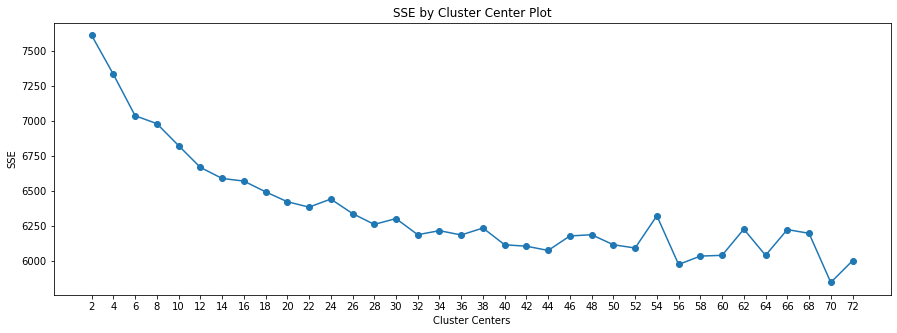

In [ ]:
find_optimal_clusters(text1, 73)

In [ ]:
clusters = MiniBatchKMeans(n_clusters=32, init_size=100, batch_size=200, random_state=20).fit_predict(text1)
clusters.shape

(8500,)

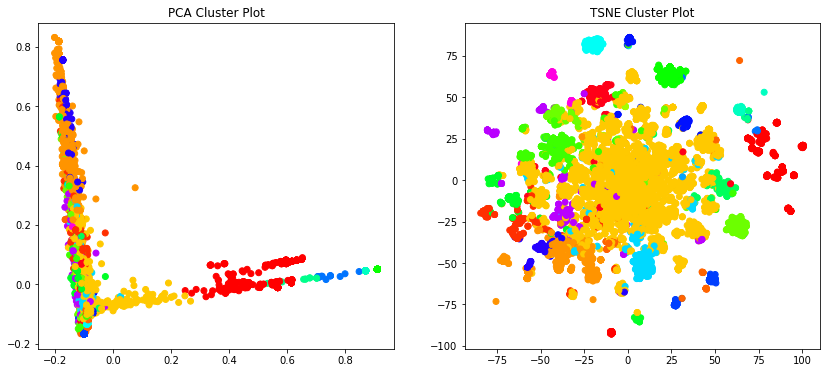

In [ ]:
num_features = clusters.shape[0]
pca_comp_count = 100
plot_tsne_pca(text1, clusters,num_features,pca_comp_count )

In [ ]:
# Fitting KMeans with number of cluster size as 24 on the text1 obtained by fitting tf-idf on description_eng column
final_model=KMeans(24)
final_model.fit(text1)
prediction=final_model.predict(text1)

#Append the prediction 
df_combined_3["GROUP"] = prediction

In [ ]:
df_combined_3.head()

,Description,Assignment group,Language,Description_eng,GroupsEncoded,GROUP
0,login issue verified user details employee man...,GRP_0,english,login issue user detail employee manager name ...,0,0
1,hello team my meetings skype meetings etc are...,GRP_0,english,hello team meeting skype meeting etc appearing...,0,21
2,cant log in to vpn hi cannot log on to vpn best,GRP_0,english,cant log vpn hi cannot log vpn,0,17
3,unable to access hr tool page,GRP_0,english,unable access hr tool page,0,22
4,skype error,GRP_0,norwegian,skype error,0,21


## **LSTM model with regrouped Data**

In [ ]:
y = np.array(df_combined_3['GROUP']) #Assigning the new group to the target variable

In [ ]:
#defining variables for maximum featrues, maximum length and embedding size
max_features = 4000
maxlen = 150
embedding_size = 100

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features, split=' ', char_level=False)

In [ ]:
tokenizer.fit_on_texts(df_combined_3['Description_eng'].values) # Fit the tokenizer object on Description column
X = tokenizer.texts_to_sequences(df_combined_3['Description_eng'].values) # Convert the text to sequence
X = tf.keras.preprocessing.sequence.pad_sequences(X,maxlen=maxlen) #Pad each example with a maximum length

In [ ]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

3651


In [ ]:
EMBEDDING_FILE = './glove.6B.50d.txt'
embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    #print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd,dtype ='float32')
    #print(embd)
    embeddings[word] = embd

In [ ]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 50))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [ ]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5950, 150) (5950,) (2550, 150) (2550,)


In [ ]:
EMBEDDING_DIM = 50
N_CLASSES = 24

In [ ]:
y_train_new = tf.keras.utils.to_categorical(y_train, N_CLASSES)
y_test_new = tf.keras.utils.to_categorical(y_test, N_CLASSES)

In [ ]:
# Create a bisirectional LSTM model with glove embedding
sequence_input = Input(shape=(maxlen,), dtype='int32')
embedding_layer = Embedding(num_words, EMBEDDING_DIM, input_length=maxlen, trainable=True, weights=[embedding_matrix])
embedded_sequences = embedding_layer(sequence_input)
x = LSTM(128, dropout=0.2, recurrent_dropout=0.2)(embedded_sequences)
predictions = Dense(N_CLASSES, activation='softmax')(x)
model_kmeans = Model(sequence_input, predictions) 

In [ ]:
model_kmeans.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_kmeans.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150)]             0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 150, 50)           182550    
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               91648     
_________________________________________________________________
dense_7 (Dense)              (None, 24)                3096      
Total params: 277,294
Trainable params: 277,294
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
modelk_history = model_kmeans.fit(x= X_train, y= y_train_new, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
149/149 [==============================] - 61s 411ms/step - loss: 1.7475 - accuracy: 0.5550 - val_loss: 1.0995 - val_accuracy: 0.6664
Epoch 2/10
149/149 [==============================] - 61s 412ms/step - loss: 0.8999 - accuracy: 0.7477 - val_loss: 0.6690 - val_accuracy: 0.7975
Epoch 3/10
149/149 [==============================] - 61s 409ms/step - loss: 0.5846 - accuracy: 0.8336 - val_loss: 0.4938 - val_accuracy: 0.8555
Epoch 4/10
149/149 [==============================] - 60s 406ms/step - loss: 0.4185 - accuracy: 0.8811 - val_loss: 0.3894 - val_accuracy: 0.8647
Epoch 5/10
149/149 [==============================] - 61s 408ms/step - loss: 0.3136 - accuracy: 0.9103 - val_loss: 0.3440 - val_accuracy: 0.8966
Epoch 6/10
149/149 [==============================] - 61s 408ms/step - loss: 0.2487 - accuracy: 0.9233 - val_loss: 0.2901 - val_accuracy: 0.9067
Epoch 7/10
149/149 [==============================] - 61s 411ms/step - loss: 0.2092 - accuracy: 0.9393 - val_loss: 0.2896 - val_ac

In [ ]:
modelk_score,modelk_acc = model_kmeans.evaluate(X_test, y_test_new, verbose = 1, batch_size = 32)
print("score: %.2f" % (modelk_score))
print("acc: %.2f" % (modelk_acc))

80/80 [==============================] - 3s 39ms/step - loss: 0.2578 - accuracy: 0.9145
score: 0.26
acc: 0.91


In [ ]:
y_predict_lstm = model_kmeans.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test_new, y_predict_lstm.round()))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        67
           1       0.88      0.95      0.91       141
           2       0.91      0.82      0.86        50
           3       0.99      1.00      1.00       285
           4       0.90      0.86      0.88        22
           5       0.97      0.91      0.94        92
           6       0.94      0.91      0.92       996
           7       0.92      0.92      0.92        49
           8       0.76      0.89      0.82        18
           9       0.91      0.78      0.84        37
          10       0.94      0.88      0.91        74
          11       0.94      0.90      0.92        73
          12       1.00      1.00      1.00        46
          13       0.75      0.92      0.83       102
          14       0.90      1.00      0.95        44
          15       1.00      0.76      0.87        34
          16       0.97      1.00      0.99        38
          17       0.90    

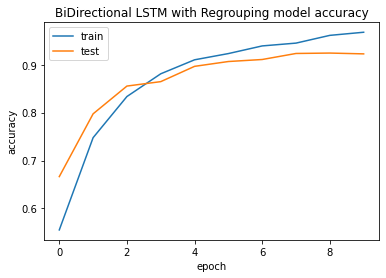

In [ ]:
# Plot a graph for train and test accuracies
plt.plot(modelk_history.history['accuracy'])
plt.plot(modelk_history.history['val_accuracy'])

plt.title("BiDirectional LSTM with Regrouping"+' model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
index, acc_value = max(enumerate(modelk_history.history['accuracy']), key=operator.itemgetter(1))
compare_results_lstm = compare_results_lstm.append({'Model Name': 'LSTM with regrouped Data', 'Training Accuracy': modelk_history.history['accuracy'][index],'Test Accuracy': modelk_acc}, ignore_index=True)

## **LSTM Results**

In [ ]:
compare_results_lstm.sort_values(by='Test Accuracy', ascending=False)

,Model Name,Training Accuracy,Test Accuracy
6,LSTM with regrouped Data,0.967857,0.914510
0,Bidirectional LSTM,0.776260,0.636471
1,LSTM With Glove Embedding,0.796429,0.636471
4,GRU with Glove Embedding,0.885924,0.624314
5,GRU with Regularizer,0.817647,0.618039
3,LSTM With Glove Embedding and Regularizer,0.772059,0.603922
2,LSTM with Glove Embedding and Learning Rate ch...,0.483193,0.484314
